Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 5.05 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [2]:
import os
#!cd /content/pytorch-CycleGAN-and-pix2pix
os.chdir('/content/pytorch-CycleGAN-and-pix2pix')
!ls 	./datasets	 
!pwd

bibtex		    download_cyclegan_dataset.sh  make_dataset_aligned.py
combine_A_and_B.py  download_pix2pix_dataset.sh   prepare_cityscapes_dataset.py
/content/pytorch-CycleGAN-and-pix2pix


In [4]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [5]:
!rm -r ./datasets/GTAVC-522
!rm -r ./datasets/Projects
!mkdir ./checks
!bash ./datasets/unzipdatasets.sh

rm: cannot remove './datasets/GTAVC-522': No such file or directory
rm: cannot remove './datasets/Projects': No such file or directory
mkdir: cannot create directory ‘./checks’: File exists
Archive:  ./datasets/gtavc2city.zip
   creating: ./datasets/gtavc2city/
   creating: ./datasets/gtavc2city/testA/
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_103662.png  
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_114484.png  
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_117528.png  
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_118181.png  
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_134541.png  
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_183772.png  
  inflating: ./datasets/gtavc2city/testA/GTA Vice City - Full Game Walkthrough in 4K_187331.png  
  inflatin

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [6]:
!python train.py --dataroot ./datasets/gtavc2city --name gtavc2city --model cycle_gan --batch_size 2 --save_latest_freq 400 --no_html --checkpoints_dir ./checks --save_epoch_freq 5 --epoch_count 326 --continue_train --n_epochs 500 --n_epochs_decay 500

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7febc67fb830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1297, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.7/multiprocessing/popen_fork.py", line 45, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 921, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.p

In [10]:
from zipfile import ZipFile
import os

checkpointpath = "/content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city"

filestowrite = ["$F_net_D_A.pth", "$F_net_D_B.pth", "$F_net_G_A.pth", "$F_net_G_B.pth", "loss_log.txt", "train_opt.txt" ]

numbertocopy = "90"

def mutateList():
    outlist = []
    for file in filestowrite:
        outpath = os.path.join(checkpointpath, file.replace("$F", numbertocopy))
        if  os.path.exists(outpath):
            print("Exists : ", outpath, os.path.exists(outpath))
            outlist.append(outpath)
    return(outlist)

def ZipFilesInList(filepath, listt):
    
    with ZipFile(filepath,"w") as newzip:
        for file in listt:
            newzip.write(file)
            print("Zipping File : ", file)
    print("Completed zipping files!" , filepath)


def main():
    outlist = mutateList()
    ZipFilesInList("/content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/gtavc2city_checkpoint_"+ numbertocopy +"_.zip", outlist)

if __name__ == "__main__":
    main()

Exists :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_D_A.pth True
Exists :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_D_B.pth True
Exists :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_G_A.pth True
Exists :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_G_B.pth True
Exists :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/loss_log.txt True
Exists :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/train_opt.txt True
Zipping File :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_D_A.pth
Zipping File :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_D_B.pth
Zipping File :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_G_A.pth
Zipping File :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/90_net_G_B.pth
Zipping File :  /content/pytorch-CycleGAN-and-pix2pix/checks/gtavc2city/loss_log.txt
Zipping File :  /content/pytorch-CycleGAN-and-pix2pix/

In [14]:
!cp ./checks/gtavc2city/latest_net_G_A.pth ./checks/gtavc2city/latest_net_G.pth

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [9]:
!cp ./checks/gtavc2city/latest_net_G_A.pth ./checks/gtavc2city/latest_net_G.pth
!rm -r /content/pytorch-CycleGAN-and-pix2pix/results/gtavc2city/test_latest
!python test.py --dataroot ./datasets/gtavc2city/testA --name gtavc2city --model test --no_dropout  --checkpoints_dir ./checks --test_all

Traceback (most recent call last):
  File "test.py", line 30, in <module>
    from options.test_options import TestOptions
  File "m:\Projects\GAN\VG2City\01-Working\28-JJ\99-Code\gtav2city-pytorch-CycleGAN\pytorch-CycleGAN-and-pix2pix\options\test_options.py", line 1, in <module>
    from .base_options import BaseOptions
  File "m:\Projects\GAN\VG2City\01-Working\28-JJ\99-Code\gtav2city-pytorch-CycleGAN\pytorch-CycleGAN-and-pix2pix\options\base_options.py", line 3, in <module>
    from util import util
  File "m:\Projects\GAN\VG2City\01-Working\28-JJ\99-Code\gtav2city-pytorch-CycleGAN\pytorch-CycleGAN-and-pix2pix\util\util.py", line 3, in <module>
    import torch
ImportError: No module named 'torch'


# Visualize

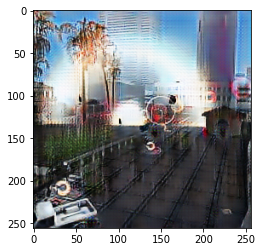

In [17]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/gtavc2city/test_latest/images/GTA Vice City - Full Game Walkthrough in 4K_103662_fake.png')
plt.imshow(img)

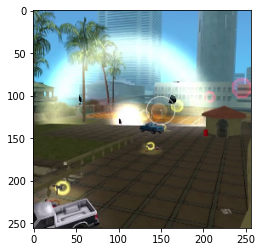

In [19]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/gtavc2city/test_latest/images/GTA Vice City - Full Game Walkthrough in 4K_103662_real.png')
plt.imshow(img)